### IDs:
Insert yours IDs to the cell below

ID #1: 203958103

ID #2: 311170575


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Correlations (14 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > 0.9$

In [1]:
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy.optimize import fsolve
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import math
warnings.filterwarnings('ignore')
sns.set(style="white", palette="muted", color_codes=True)

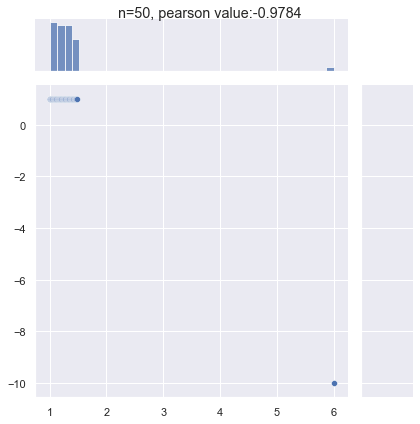

In [5]:
#loading a dataset of 50 numbers for x, y
x = np.ones(50)
y = np.ones(50)
for i in range(49):
    y[i] += i*0.0001
    x[i] += i*0.01
#applying outliers to change the correlation with n-1
y[49] = -10
x[49] = 6

#getting the pearson correlations for x,y and for x-1, y-1
corr = pearsonr(x, y);
corr2 = pearsonr(x[:48], y[:48])

sns.set()

p = sns.jointplot(x = x, y = y)
p.fig.suptitle(f'n=50, pearson value:{corr[0]:.4f}')
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)


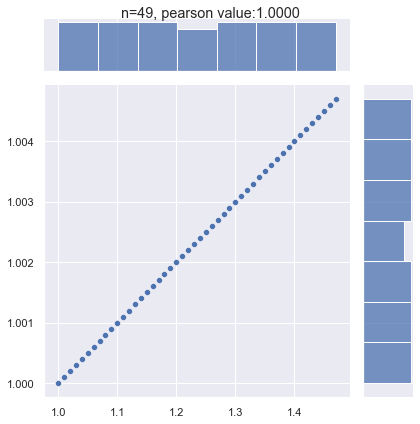

In [7]:
p2 = sns.jointplot(x = x[:48], y = y[:48])
p2.fig.suptitle(f'n=49, pearson value:{corr2[0]:.4f}')
p2.fig.tight_layout()
p2.fig.subplots_adjust(top=0.95)

#### 1.B
Data in which  $\rho(x,y) = 1$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $\rho(x_{n-1},y_{n-1}) < 0.9$

**Answer:**

this situation is not possible beacuse the correlation is messured over all the point, so if we reduce the number of points, the correaltion can only be higher and not lower 

#### 1.C
Data with τ(x,y) > ρ(x,y) + 0.45

kendalls rank: 0.0204
spearmans rank: -0.4406
the difference between kendalls rank and spearmans rank is 0.4610


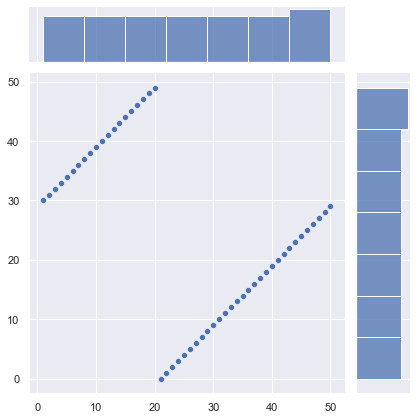

In [8]:
from scipy.stats import kendalltau
from scipy.stats import spearmanr
x = np.ones(50)
y = np.ones(50)
y[0] = 30
for i in range(1,50):
    if i < 20:
        x[i] = x[i-1] + 1
        y[i] = y[i-1] + 1
    if i == 20:
        x[i] = x[i-1] + 1 
        y[i] = 0
    if i > 20:
        x[i] = x[i-1] + 1
        y[i] = y[i-1] + 1

sns.jointplot(x = x,y = y)

tau, pvalue1 = kendalltau(x,y)
spearman, pvalue2 = spearmanr(x,y)
print(f'kendalls rank: {tau:.4f}')
print(f'spearmans rank: {spearman:.4f}')
print(f'the difference between kendalls rank and spearmans rank is {tau - spearman:.4f}')

#### 1.D
Data with τ(x,y) < ρ(x,y) – 0.45

kendalls rank: -0.0204
spearmans rank: 0.4406
the difference between kendalls rank and spearmans rank is -0.4610


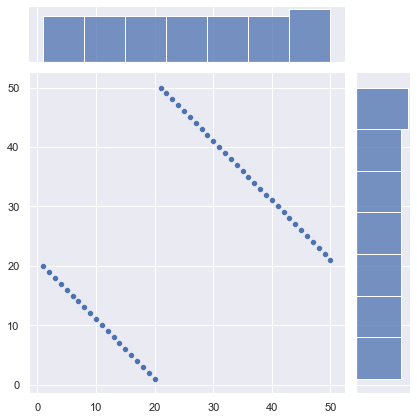

In [9]:
x = np.ones(50)
y = np.ones(50)
y[0] = 20
for i in range(1,50):
    x[i] = x[i-1] + 1
    if i < 20:
        y[i] = y[i-1] - 1
    if i == 20: 
        y[i] = 50
    if i > 20:
        y[i] = y[i-1] - 1

sns.jointplot(x = x,y = y)

tau, pvalue1 = kendalltau(x,y)
spearman, pvalue2 = spearmanr(x,y)
print(f'kendalls rank: {tau:.4f}')
print(f'spearmans rank: {spearman:.4f}')
print(f'the difference between kendalls rank and spearmans rank is {tau - spearman:.4f}')

#### 1.E
Data with Pearson(x,y) < ρ(x,y) – 0.6

pearson rank: 0.1905
spearman rank: 1.0000
the difference between the pearson correlation and the spearman rank is -0.8095


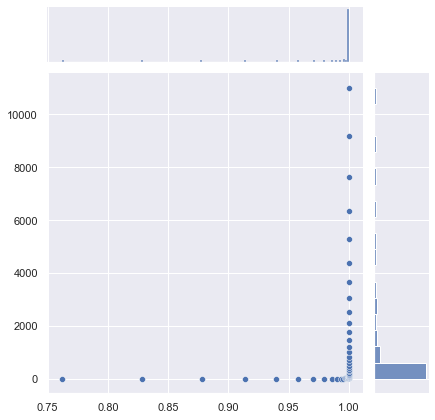

In [10]:
#using the correlations between tan and sin
x = np.tanh(np.linspace(1,10,50))
y = np.sinh(np.linspace(1,10,50))

sns.jointplot(x = x, y = y)
a, p1 = pearsonr(x,y)
b, p2 = spearmanr(x,y)
print(f'pearson rank: {a:.4f}')
print(f'spearman rank: {b:.4f}')
print(f'the difference between the pearson correlation and the spearman rank is {a-b:.4f}')

#### 1.F
Data with Pearson(x,y) > ρ(x,y) + 1.2

pearson rank: 0.8674
spearman rank: -0.8824
the difference between the pearson correlation and the spearman rank is 1.7497


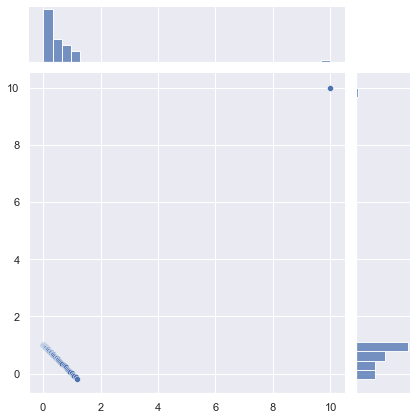

In [11]:
#using the correlations between than tan and sin
x = np.ones(50)
y = np.ones(50)
x[0] = 0.01
x[49] = 10
y[49] = 10
for i in range(1,49):
    x[i] = x[i-1] + i*0.001
    y[i] = y[i-1] - i*0.001

    
sns.jointplot(x = x, y = y)
a, p1 = pearsonr(x,y)
b, p2 = spearmanr(x,y)
print(f'pearson rank: {a:.4f}')
print(f'spearman rank: {b:.4f}')
print(f'the difference between the pearson correlation and the spearman rank is {a-b:.4f}')

#### 1.G
Data with τ(x,y) < ρ(x,y) – 1.2 

This is not possible because both kendell and spearman messure rank based correlation, so they are both should have the same sign (+/-)

### Question 2 - Analysis of the UCI Heart Disease dataset  (38 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


In [ ]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

In [14]:
df = pd.read_csv(r'./heart.csv', sep = '\t')

## explanation of the data

age: age in years <br>
sex: sex (1 = male; 0 = female)<br>
cp: chest pain type<br>
-- Value 0: typical angina<br>
-- Value 1: atypical angina<br>
-- Value 2: non-anginal pain<br>
-- Value 3: asymptomatic<br>
trestbps: resting blood pressure (in mm Hg on admission to the hospital)<br>
chol: serum cholestoral in mg/dl<br>
fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)<br>
restecg: resting electrocardiographic results<br>
-- Value 0: normal<br>
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria<br>
thalach: maximum heart rate achieved<br>
exang: exercise induced angina (1 = yes; 0 = no)<br>
oldpeak = ST depression induced by exercise relative to rest<br>
slope: the slope of the peak exercise ST segment<br>
-- Value 0: upsloping<br>
-- Value 1: flat<br>
-- Value 2: downsloping<br>
ca: number of major vessels (0-3) colored by flourosopy<br>
thal: 0 = normal; 1 = fixed defect; 2 = reversable defect<br>
and the label<br>
condition: 0 = no disease, 1 = disease<br>

## filling all na's

In [15]:
#filling all empty data with means / modes depending on column values
df['age'].fillna(value = int(df['age'].mean()), inplace=True)
df['sex'].fillna(value = df['sex'].mode(), inplace = True)
df['cp'].fillna(value = int(df['cp'].mode()), inplace = True)
df['trestbps'].fillna(value = int(df['trestbps'].mean()), inplace = True)
df['chol'].fillna(value = int(df['chol'].mean()), inplace = True)
df['fbs'].fillna(value = int(df['fbs'].mode()), inplace = True)
df['restecg'].fillna(value = int(df['restecg'].mode()), inplace = True)
df['thalach'].fillna(value = int(df['thalach'].mean()), inplace = True)
df['exang'].fillna(value = int(df['exang'].mode()), inplace = True)
df['oldpeak'].fillna(value = int(df['oldpeak'].mean()), inplace = True)
df['slope'].fillna(value = int(df['slope'].mode()), inplace = True)
df['ca'].fillna(value = int(df['ca'].mode()), inplace = True)
df['thal'].fillna(value = int(df['thal'].mode()), inplace = True)
df['target'].fillna(value = int(df['target'].mode()), inplace = True)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,0.0,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,131.0,245.0,0.0,0.0,172.0,0,1.4,2,0,2,1
3,54.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,54.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,54.0,0.0,0.0,140.0,245.0,0.0,1.0,123.0,1,0.2,1,0,3,0
299,54.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0,1.0,1,0,3,0
300,68.0,1.0,0.0,144.0,193.0,1.0,1.0,149.0,0,3.4,1,2,3,0
301,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1,1.2,1,1,3,0


### 1. Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population mean is larger / smaller than the disease population mean

In [18]:
#h = healthy, d = disease
dfh = df[df['target']==0]
dfs = df[df['target']==1]

def checkiflargeorsmall(x, y, confidence = 0.95): #x, y are lists or columns
    degree = min((len(x)-1),(len(y) -1))
    t_crit = stats.t.ppf(confidence, degree)
    se_x = t_crit*x.std()/np.sqrt(len(x))
    se_y = t_crit*y.std()/np.sqrt(len(y))
    xlow = x.mean() - (t_crit*se_x)
    xhigh = x.mean() + (t_crit*se_x)
    ylow = y.mean() - (t_crit*se_y)
    yhigh = y.mean() + (t_crit*se_y)
    
    if(xlow > yhigh):
        print(f'healthy group stats are higher by confidence of {confidence}')
    elif(ylow > xhigh):
        print(f'diseased stats are higher by confidence of {confidence}')
    else:
        print(f'they are about the same in a confidence of {confidence}')

print('age:')
checkiflargeorsmall(dfh['age'], dfs['age'])

print('resting blood pressure:')
checkiflargeorsmall(dfh['trestbps'], dfs['trestbps'])

print('chol:')
checkiflargeorsmall(dfh['chol'], dfs['chol'])

print('thalach:')
checkiflargeorsmall(dfh['thalach'], dfs['thalach'])

print('old peak:')
checkiflargeorsmall(dfh['oldpeak'], dfs['oldpeak'])

age:
healthy group stats are higher by confidence of 0.95
resting blood pressure:
they are about the same in a confidence of 0.95
chol:
they are about the same in a confidence of 0.95
thalach:
diseased stats are higher by confidence of 0.95
old peak:
healthy group stats are higher by confidence of 0.95


### 2. Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.

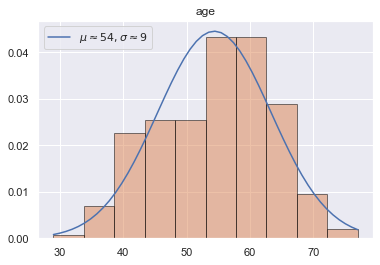

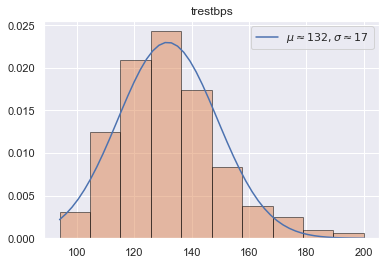

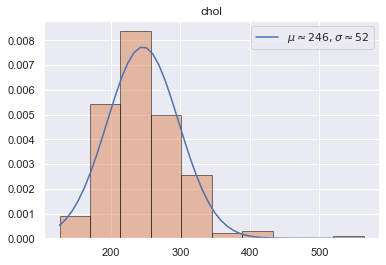

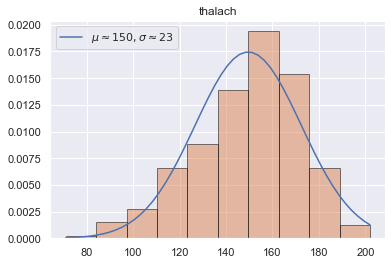

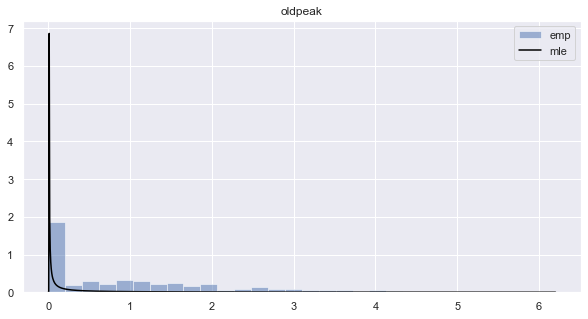

In [24]:
def plotlog(df):
    x_1 = np.linspace(np.min(df), np.max(df), 1000)
    shape, loc, scale = stats.lognorm.fit(df.replace([0],0.01).copy())
    pdf = stats.lognorm.pdf(x_1,shape, loc = loc, scale = scale)
    plt.figure(figsize=(10, 5))     
    plt.hist(df,bins = 30,  density = True, alpha = 0.5, label="emp")     
    plt.plot(x_1, pdf,'black', label="mle")
    plt.title(df.name)
    plt.legend()
    plt.show()

def plotmle(df):
    domain = np.linspace(np.min(df), np.max(df))
    mean = np.mean(df)
    std = np.std(df, ddof = 1)
    plt.plot(domain, stats.norm.pdf(domain, mean, std),
        label = f'$ \mu \\approx {round(mean)}, \sigma \\approx {round(std)}$')
    plt.hist(df, density = True, edgecolor = 'black', alpha = 0.5, bins = 10)
    plt.title(df.name)
    plt.legend()
    plt.show()
    
plotmle(df['age'])
plotmle(df['trestbps'])
plotmle(df['chol'])
plotmle(df['thalach'])
plotlog(df['oldpeak'])

## For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms and find bivariate normal fits.

In [25]:
dfnum = df[['age','trestbps','chol','thalach','oldpeak']]
dfnum.corr()

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.257350,0.207320,-0.403506,0.219298
trestbps,0.257350,1.000000,0.114741,-0.041048,0.194669
chol,0.207320,0.114741,1.000000,-0.016519,0.058702
thalach,-0.403506,-0.041048,-0.016519,1.000000,-0.332344
oldpeak,0.219298,0.194669,0.058702,-0.332344,1.000000


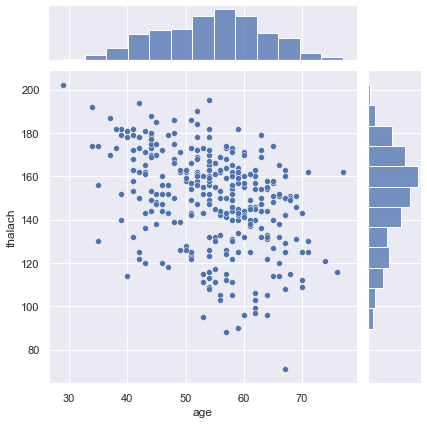

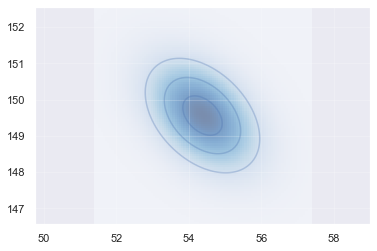

In [26]:
#comparison between age and maximum heart rate
sns.jointplot(x = df['age'], y = df['thalach'])
compare=['age','thalach']
means=[df[compare[0]].mean(),df[compare[1]].mean()]
cov=df[compare].corr().values.tolist()
plot_2d_Gaussian_pdf(means, cov)

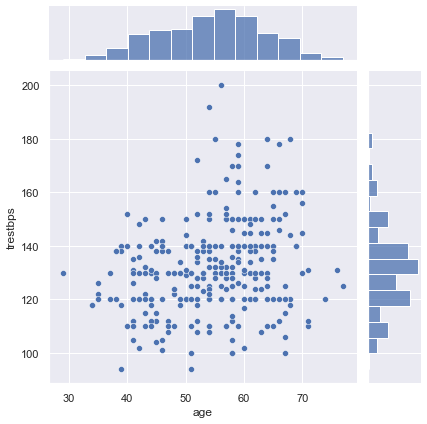

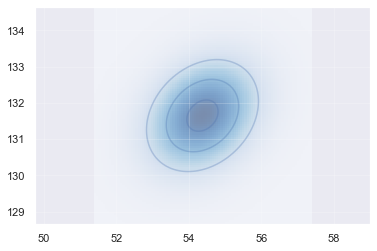

In [27]:
#comparison between age and resting heart rate
sns.jointplot(x = df['age'], y = df['trestbps'])
compare=['age','trestbps']
means=[df[compare[0]].mean(),df[compare[1]].mean()]
cov=df[compare].corr().values.tolist()
plot_2d_Gaussian_pdf(means, cov)

## pairs that are significantly different between male vs female or healthy vs diseased

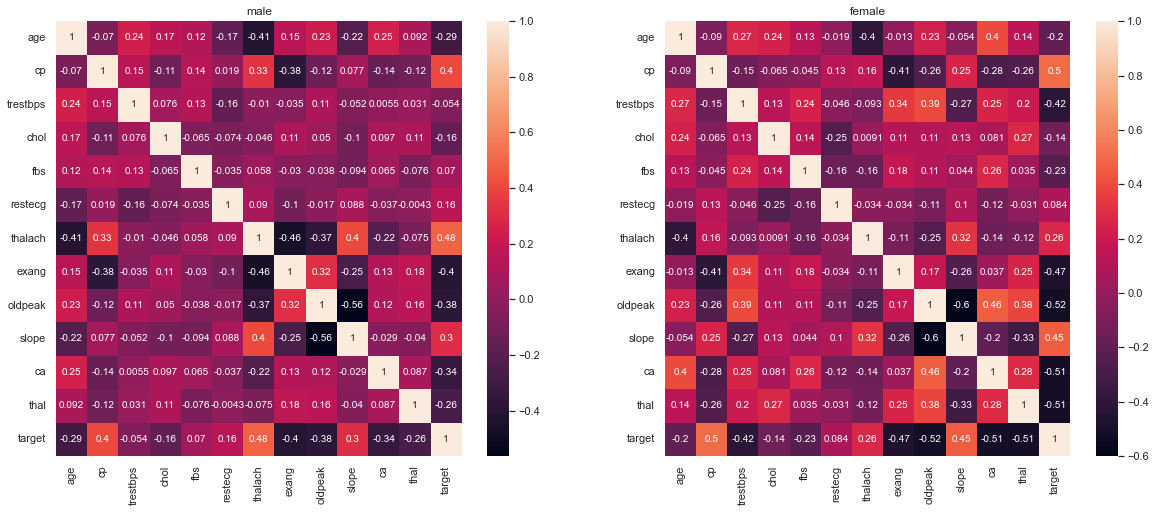

In [28]:
#groupby sex
diffsex = df.groupby(by = 'sex')
male = diffsex.get_group(1)
female = diffsex.get_group(0)
#dropping the sex column for each group for the corr chart
male = male.drop(['sex'], axis = 1)
female = female.drop(['sex'], axis = 1)

#heat map of correlations
fig, ax = plt.subplots(1,2, figsize = (20,8))
ax[0].set_title('male')
sns.heatmap(male.corr(), annot = True, ax = ax[0])
ax[1].set_title('female')
sns.heatmap(female.corr(), annot = True, ax = ax[1]);

exang     trestbps    0.377018
trestbps  exang       0.377018
target    trestbps    0.362752
trestbps  target      0.362752
exang     thalach     0.355009
thalach   exang       0.355009
dtype: float64


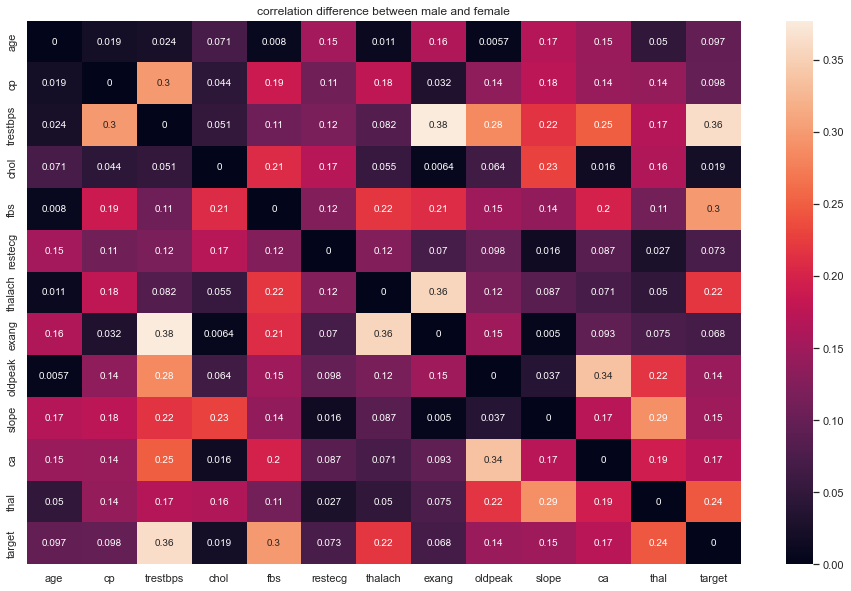

In [29]:
correlations = (abs(male.corr() - female.corr()))
s = correlations.unstack()
c = s.sort_values(kind = 'quicksort', ascending=False)
plt.figure(figsize = (16,10))
sns.heatmap(correlations, annot = True);
plt.title('correlation difference between male and female');
print(c.head(6));

### The 3 pairs that have the most significant difference in correlation between male and female are:
exang - trestbps <br>
target - trestbps <br>
exang - thalach <br>



<Figure size 1152x648 with 0 Axes>

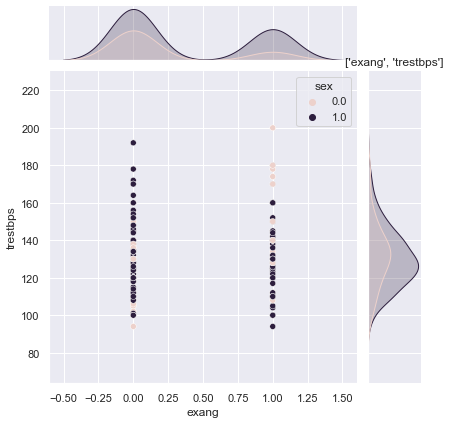

<Figure size 1152x648 with 0 Axes>

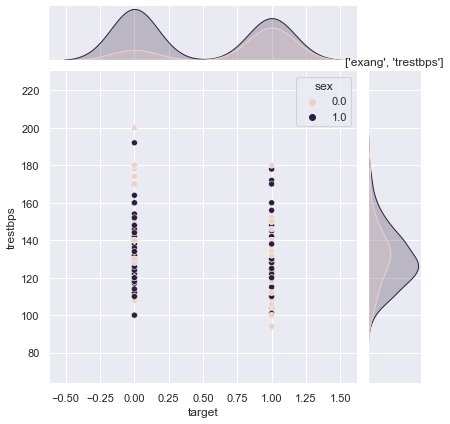

<Figure size 1152x648 with 0 Axes>

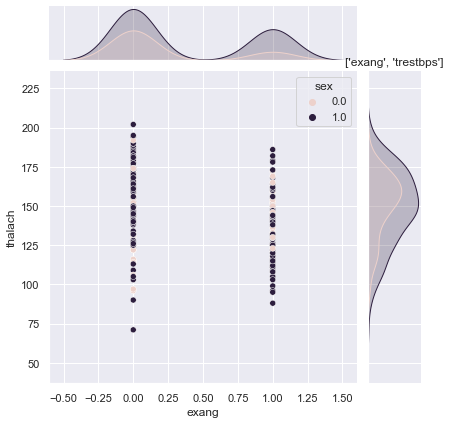

In [30]:
#using a jointplot to show the difference between men and women on each of the 3 most significant correlations

compare = [['exang', 'trestbps'],['target','trestbps'], ['exang','thalach']]

for i in range(3):
    fig = plt.figure(figsize = (16,9));
    ax = sns.jointplot(data=df, x= df[compare[i][0]], y=df[compare[i][1]], hue= df['sex']);
    plt.title(compare[0]);

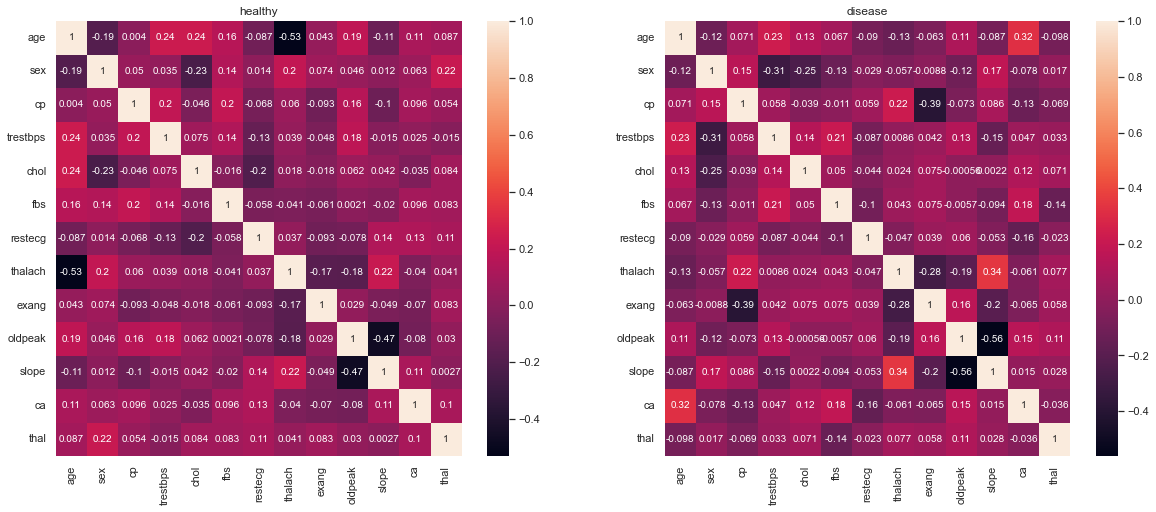

In [31]:
#groupby health
health = df.groupby(by = 'target')
healthy = health.get_group(1)
disease = health.get_group(0)

#dropping the target column for each group for the corr chart
healthy = healthy.drop(['target'], axis = 1)
disease = disease.drop(['target'], axis = 1)

#heat map of correlations
fig, ax = plt.subplots(1,2, figsize = (20,8))

ax[0].set_title('healthy')
sns.heatmap(healthy.corr(), annot = True, ax = ax[0])
ax[1].set_title('disease')
sns.heatmap(disease.corr(), annot = True, ax = ax[1]);

thalach   age         0.395387
age       thalach     0.395387
trestbps  sex         0.345095
sex       trestbps    0.345095
exang     cp          0.300138
cp        exang       0.300138
dtype: float64


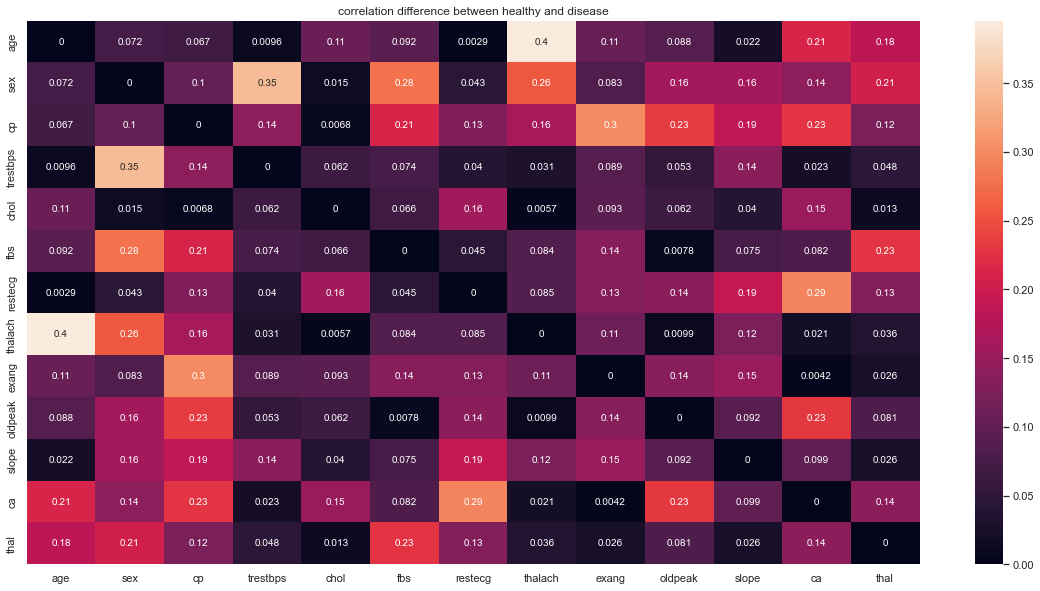

In [32]:
correlationsh = (abs(healthy.corr() - disease.corr()))
s = correlationsh.unstack()
c = s.sort_values(kind = 'quicksort', ascending=False)
plt.figure(figsize = (20,10))
sns.heatmap(correlationsh, annot = True);
plt.title('correlation difference between healthy and disease');
print(c.head(6));

### The 3 pairs that have the most significant difference in correlation between healthy and diseased are:
thalach - age <br>
trestbps - sex <br>
exang - cp <br>

## For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease

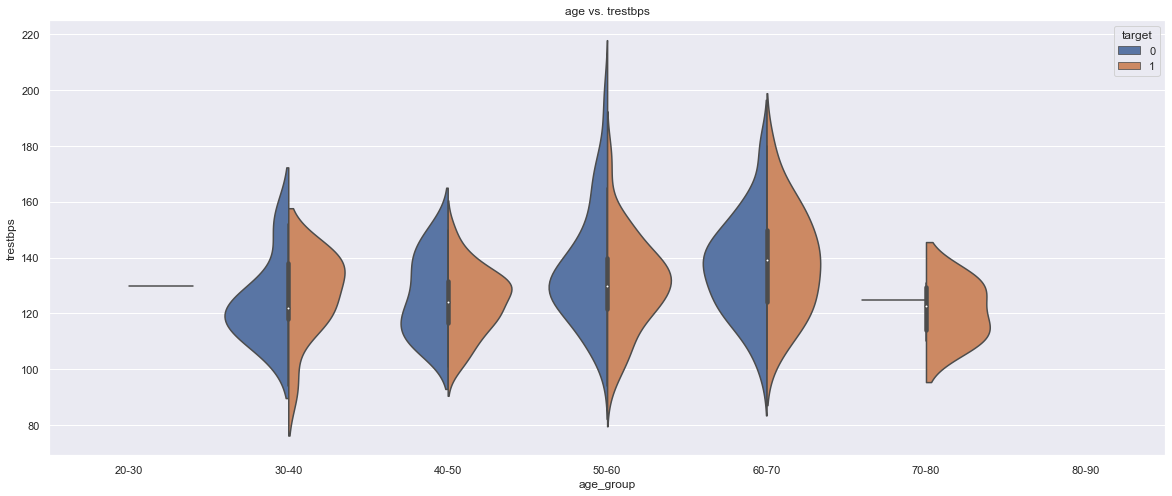

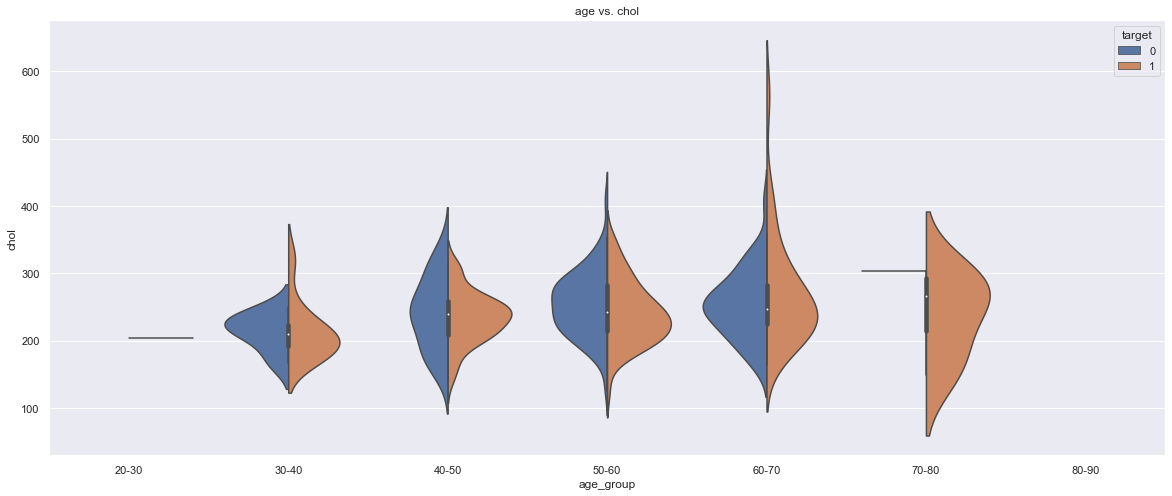

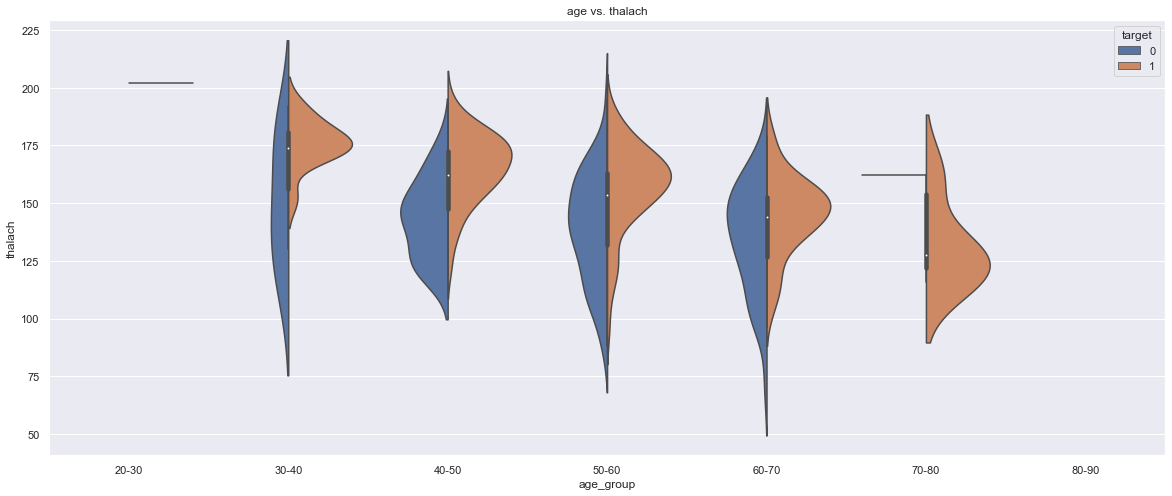

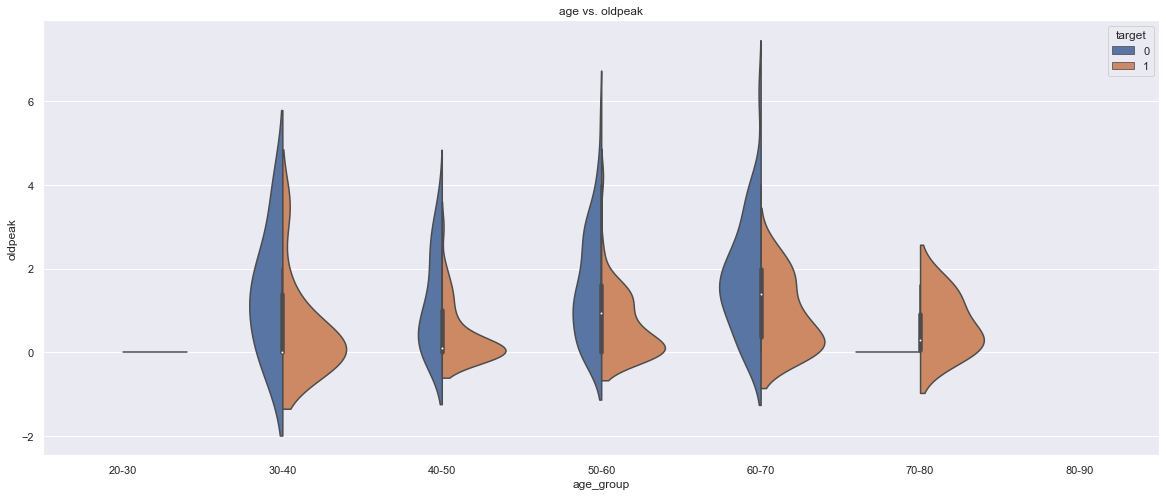

In [33]:
numerical = ['trestbps','chol','thalach','oldpeak']
dfnum1 = df.copy()
dfnum1['age_group'] = pd.cut(df['age'], bins=[20,30,40,50,60,70,80,90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

for i in numerical:
    fig = plt.figure(figsize = (20,8))
    ax = sns.violinplot(data=dfnum1, x= "age_group", y=i, hue="target", bins = 5, split = True)
    ax.set_title(f'age vs. {i}')

# original question:
using the age group bins, i want to find out if there is any difference on healthy or diseased patients regarding their age and their trestbps, i will use a boxplot for this comparison

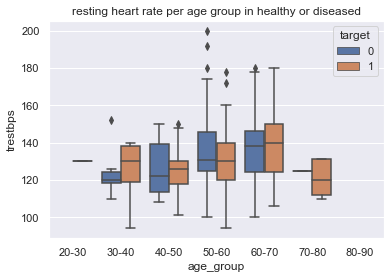

In [34]:
dfage = df.copy()
dfage['age_group'] = pd.cut(df['age'], bins=[20,30,40,50,60,70,80,90], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90'])

sns.boxplot(data=dfage, x="age_group", y='trestbps', hue="target");
plt.title('resting heart rate per age group in healthy or diseased');

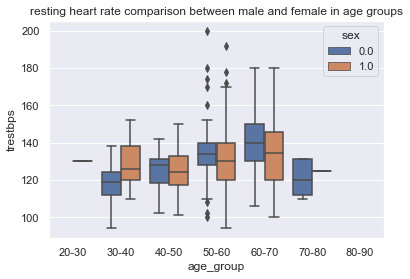

In [35]:
sns.boxplot(data=dfage, x="age_group", y='trestbps', hue="sex");
plt.title('resting heart rate comparison between male and female in age groups');

### Question 3 - Heavy Tailed Distributions and the Exponential Distribution (16 points)

### Heavy Tailed Distributions

Recall the definition of Heavy Tailed distribution from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

Does the standard log-normal distribution have a heavy right tail? prove your answer.

**Answer:**

Yes. The standard log-normal distribution has a heavy right side tail.

**Proof**:

definition:

$ \forall t>0, \lim_{y\to\infty} e^{ty}P(Y>y)=\infty $

Let y be a log-normal random variable, $y\sim N(\mu,\sigma)$

from the lecture we know that:

$ CDF(y)=F(y) = \Phi (ln y) $

$ PDF(y)=f(y) = \frac{\varphi(ln y)}{y}$

$ \lim_{y\to\infty} e^{ty}P(Y>y)= \lim_{y\to\infty} e^{ty}(1-\int_{-\infty}^{y} \frac{\varphi(lny)}{y}dy)$

To solve this limit, we can use the fact that:

$\lim_{x \to \infty} \varphi(x) = 0$

This follows from the definition of the standard normal distribution:

$\phi(x) = \frac{1}{\sqrt{2 \pi}} e^{-\frac{x^2}{2}}$

As $x$ approaches infinity, the exponent $-\frac{x^2}{2}$ becomes very negative, and the entire expression approaches 0.

Using this fact, we can rewrite the limit as:

$\lim_{y \to \infty} e^{ty}P(Y>y) = \lim_{y \to \infty} e^{ty}(1-\int_{-\infty}^{y} \frac{\varphi(lny)}{y}dy) \ $

$ = \lim_{y \to \infty} e^{ty} - \lim_{y \to \infty} e^{ty} \int_{-\infty}^{y} \frac{\varphi(lny)}{y}dy \ $

$ = \lim_{y \to \infty} e^{ty} - \lim_{y \to \infty} \int_{-\infty}^{y} e^{ty} \frac{\varphi(lny)}{y}dy \ $

$ = \lim_{y \to \infty} e^{ty} - \int_{-\infty}^{\infty} e^{ty} \frac{\varphi(lny)}{y}dy \ $

$ = e^{\infty} - \int_{-\infty}^{\infty} e^{ty} \frac{\varphi(lny)}{y}dy \$

$ = \boxed{\infty} $

**This means that the original limit approaches infinity as $y$ approaches infinity.**

### Special Properties of the Exponential Distribution

Let $X_1 \sim exp(\lambda_1)$ and $X_2 \sim exp(\lambda_2)$ be two independent exponential random variables.

Calculate $P(X_1 < X_2)$.

**Answer:**

Let $Z$ be a new random variable, s.t $Z=X_2-X_1$

Since $X_1$ and $X_2$ are independant, the following is true:

$P(Z)=P(X_1)\cdot P(X_2)$

So: $P(Z) = \lambda_1 e^{-x\lambda_1} \cdot \lambda_2 e^{-x\lambda_2}= \lambda_1\lambda_2 e^{-x(\lambda_1+\lambda_2)}$


$ P(X_1<X_2)=P(X_2-X_1>0)=P(Z>0)$

Since $\lambda>0$, $P(Z>0)$ is:

$\int_0^{\infty} f(x) dx = \int_0^{\infty} \lambda_1 \lambda_2 e^{-x(\lambda_1 + \lambda_2)} dx = \lambda_1\lambda_2\int_0^{\infty} e^{-x(\lambda_1+\lambda_2)} dx = \frac{-\lambda_1\lambda_2}{\lambda_1+\lambda_2}\left[e^{-\infty(\lambda_1+\lambda_2)}-e^{-0(\lambda_1+\lambda_2)}\right] = \frac{\lambda_1\lambda_2}{\lambda_1 + \lambda_2}$

**Therefore, the probability that $X_1 < X_2$ is:**

$P(X_1 < X_2) = \boxed{\frac{\lambda_1\lambda_2}{\lambda_1 + \lambda_2}}$

### Question 4 - CLT for Markov chains (16 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, X0, is Unif(1..6)<br>
After i rolls are determined the i+1st, Xi+1, is drawn according to the row that corresponds to the value of Xi in the matrix T below. <br>
In other words, T is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

**Answer:**
1. 
$\pi_0 = (1/6, 1/6, 1/6, 1/6, 1/6, 1/6)$ is the eigen vector of the matrix $T$

    Also, the matrix is symetric in a way that the probabilty to transition from every number to any other and back is the same. For example: $P(3|5)=P(5|3)=0.1$

    More generally: $P(X_j|X_i)=P(X_i|X_j)=T(j,i)=T(i,j)$

    From this we know that the vector will remain the same after each multiplication of $\pi_0$ and $T$
    
    Since $X_0\sim Unif(1,..,6)$ than the expected value of each number in the trajectory is $E(X)=\frac{(1+2+3+4+5+6)}{6}=3.5$
    
    So, the average value of the entire trajectory is $\frac{1}{n}\sum_{i=1}^{n}E(X_n)=\frac{1}{30}\cdot30\cdot3.5=\boxed{3.5}$

2. See code below
3. The distribution looks similar to normal distribution, with empirical mean of 3.511, and epmirical std of 0.475

In [36]:
def markov(T, x0, r):
    '''
    T: the transform matrix
    x0: the first value
    r: number of transformations
    return: trajectory of length r'''
    
    traj = [x0 + 1]
    
    for j in range(r):
            x0 = random.choices(range(6), weights=T[x0])[0]
            traj.append(x0 + 1)
        
    return traj

def multi_markov(n, T, r):
    '''
    T: the transform matrix
    r: number of transformations
    n: number of trajectories
    return: array of length n of markov trajectories of length r'''
    
    trajectories = []
    
    for i in range(n):
        x = random.choice(range(6))
        trajectory = markov(T, x, r)
        trajectories.append(trajectory)
        
    return trajectories
        
    

In [37]:
matrix = np.array([[0.4, 0.2, 0.1, 0.0, 0.1, 0.2],
                   [0.2, 0.4, 0.2, 0.1, 0.0, 0.1],
                   [0.1, 0.2, 0.4, 0.2, 0.1, 0.0],
                   [0.0, 0.1, 0.2, 0.4, 0.2, 0.1],
                   [0.1, 0.0, 0.1, 0.2, 0.4, 0.2],
                   [0.2, 0.1, 0.0, 0.1, 0.2, 0.4]])


In [38]:
all_trajectories = multi_markov(n=1000, r=30, T=matrix)

trajectories_avg = np.average(all_trajectories, axis=1)

The empirical mean is: 3.481 
The empirical std is: 0.476


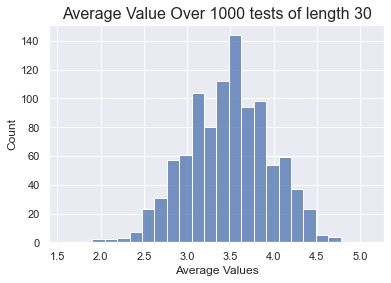

In [39]:
min_x = np.min(trajectories_avg)
max_x = np.max(trajectories_avg)

mean_1 = trajectories_avg.mean()
std_1 = trajectories_avg.std()

fig1, ax1 = plt.subplots()
plt.subplot(111)
ax1 = sns.histplot(trajectories_avg, bins=20)
plt.xlabel('Average Values')
plt.xlim(min_x-0.5, max_x+0.5)
plt.title('Average Value Over 1000 tests of length 30', fontsize=16)
print(f'The empirical mean is: {mean_1:.3f} \nThe empirical std is: {std_1:.3f}');



##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

**Answer:**
1. The expected average value remains the same, 3.5, because we showed that it does not depends on the length of the trajectory.
2. See code below
3. The distribution also looks like normal distribution, with empirical mean of 3.5, and empirical std of 0.116

The empirical mean is: 3.494 
The empirical std is: 0.117


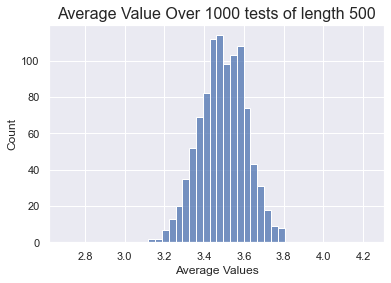

In [40]:
all_trajectories_2 = multi_markov(n=1000, r=500, T=matrix)

trajectories_avg_2 = np.average(all_trajectories_2, axis=1)

min_x = np.min(trajectories_avg_2)
max_x = np.max(trajectories_avg_2)

mean_2 = trajectories_avg_2.mean()
std_2 = trajectories_avg_2.std()

fig2, ax2 = plt.subplots()
plt.subplot(111)
ax2 = sns.histplot(trajectories_avg_2, bins=20)
plt.xlabel('Average Values')
plt.xlim(min_x-0.5, max_x+0.5)
plt.title('Average Value Over 1000 tests of length 500', fontsize=16)
print(f'The empirical mean is: {mean_2:.3f} \nThe empirical std is: {std_2:.3f}');


#### 4.C
Draw normal fit curves on your two histograms.

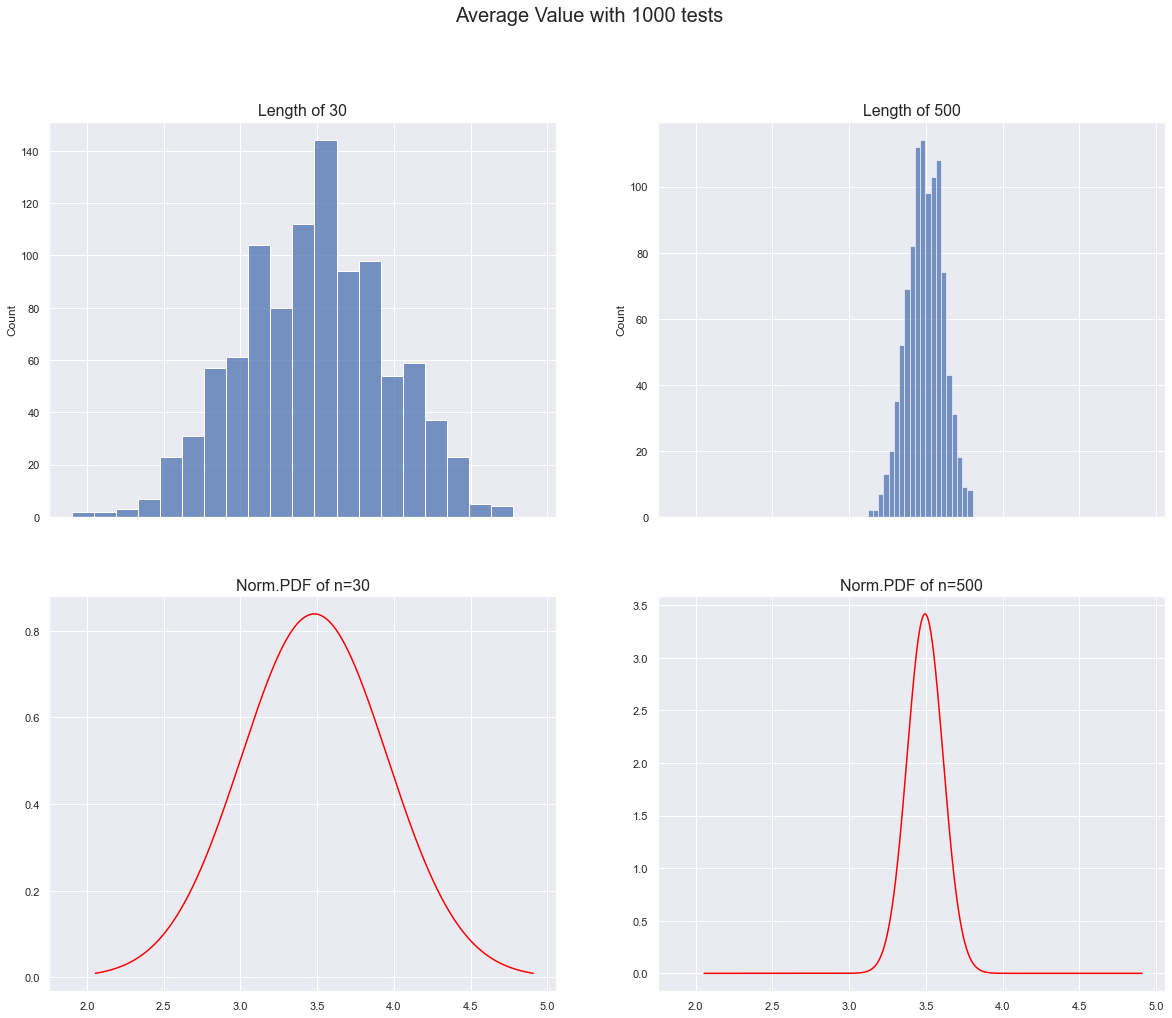

In [41]:
x1 = np.linspace(mean_1 - 3*std_1, mean_1 + 3*std_1, 1000)
x2 = np.linspace(mean_2 - 3*std_2, mean_2 + 3*std_2, 1000)
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,16))
fig.suptitle('Average Value with 1000 tests', fontsize=20)
axes[0][0].set_title('Length of 30', fontsize=16)
axes[0][1].set_title('Length of 500', fontsize=16)
sns.histplot(ax=axes[0][0], data=trajectories_avg, bins=20)
sns.histplot(ax=axes[0][1], data=trajectories_avg_2, bins=20)
axes[1][0].plot(x1, stats.norm.pdf(x1, mean_1, std_1), color='red')
axes[1][1].plot(x1, stats.norm.pdf(x1, mean_2, std_2), color='red')
axes[1][0].set_title('Norm.PDF of n=30', fontsize=16)
axes[1][1].set_title('Norm.PDF of n=500', fontsize=16);


#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

**Answer**

$Cov(X_0,X_i)=E(X_0*X_i)-E(X_0)*E(X_i)$

$E(X)=\sum_{i=1}^{n}x_iP(X=x_i)$

$E(X_i)=\sum_{j=1}^{6}\sum_{k=1}^{6}x_k\cdot P(X=x_k|x_0=j)\cdot P(x_0=j)$

$P(X=x_k|x_0=j)=\pi_0\cdot (T^i)_{kj}$

In our case:

$E(X_0)=\sum_{i=1}^{6}x_iP(X=x_i)=\frac{1}{6}(1+2+3+4+5+6)=3.5$

Since $\pi_0$ is the eigen vector of T, we know that $\pi_n=\pi_0$

From this we know that:

$E(X_i)=\sum_{j=1}^{6}x_jP(x_j|x_n)=\sum_{j=1}^{6}x_j\cdot1/6=\frac{1}{6}(1+2+3+4+5+6)=3.5$

We also know from the above, that $P(X_i)$ is independant of $\pi_0$ defacto because no matter what is the previous state, the probabilities for each new state are the same and equal to $\frac{1}{6}$

**So the covariance in our case is 0**

In [42]:
def covs(p0, t, n):
    '''
    p0: probabilities vector of the first number
    t: transition matrix
    n: length of maxmimal trajectory
    return: array of covariances between X_0 and X_i
    '''
    covs = []
    
    for i in range(1,n):
        t_i = np.linalg.matrix_power(t, i) # compute T**i
        p_i = p0 @ t_i # compute Pi_i
        cov = np.cov(p0,p_i)[0][1] # compute covariance using covariance matrix
        covs.append(round(cov,5)) # add to the list of covariances
        
    return covs

In [43]:
x0 = np.ones((1,6))/6
t = matrix
n = 500

print(covs(x0,t,n))

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

### Question 5 - Distributions (16 Points)

Let $X$ be a random variable. Consider the number $q$ so that $P(X\le q)=0.8$ (assume that such a value exists).

Consider a sample $\vec{x}(n) = x_1,...,x_n$ sampled independently from $X$. Denote the sorted observations by: $a_1 \le a_2 \le ... \le a_n$. Also assume that $n \ge 100$.

Let $R(\vec{x}(n))$ be the largest index $i \in {1,...,n}$ such that $a_i \le q$. If $a_1 > q$ then $R = 0$.

1. What is $P(R = 0)$?
1. What is the distribution of $R$?
1. Given $n$, write code that computes an index $\lambda (n)$ so that $P(a_{\lambda (n)} \le q) \ge 0.9$ and $P(a_{\lambda (n)+1} \le q) < 0.9$.
1. Let $X \sim Unif(0,1)$, $q$ as above and $n=100$. Compute $\lambda (n)$ as above. Run 200 experiments that calculate $a_{\lambda (n)}$ for independent drawing from $X$. How many times did you observe $a_{\lambda (n)} \le q$?

**Answer**
1. $P(R=0)=(1-0.8)^n=0.2^n$

    if $n\leq100$, then: $P(R=0)\leq 0.2^{100} \leq 1.267*10^{-70}$


2. The probability to each $a_i$ to be smaller or equal to $q$ is 0.8.
So, regarding $q$, $a_i\sim Bernoulli(0.8)$ to be smaller than $q$.
If we look at all $a_i$, the question how many numbers are smaller than $q$ is a Binom test, so $\boxed{R\sim Binom(n,0.8)}$

3. 

In [2]:
def get_lambda(n,p):
    for lamda in range(0,n):
        if (1-stats.binom.cdf(lamda,n,p) >= 0.9) and (1-stats.binom.cdf(lamda+1,n,p) < 0.9):
            return lamda
    

4. 

In [3]:
a_count = 0
n = 100
k = 200
X = stats.uniform(0,1)
p = 0.8
q = X.ppf(p) # q=0.8
lamda = get_lambda(n,p)
for i in range(k):
    data = np.sort(X.rvs(n))
    if data[lamda] <= q:
        a_count += 1

print(f'a_lamda(n) <= q {a_count} times \n which is {a_count/k*100:.2f}% of the times')
    

a_lamda(n) <= q 184 times 
 which is 92.00% of the times
